<a href="https://colab.research.google.com/github/saideepthi473/PCOS_predictor/blob/main/pcos_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pcos.xlsx to pcos (2).xlsx
Initial Data Snapshot:
   Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Cycle(R/I)  \
0                 1           0          28         44.6           2   
1                 2           0          36         65.0           2   
2                 3           1          33         68.8           2   
3                 4           0          37         65.0           2   
4                 5           0          25         52.0           2   

   Cycle length(days)  FSH(mIU/mL)  LH(mIU/mL) AMH(ng/mL)  RBS(mg/dl)  \
0                   5         7.95        3.68       2.07        92.0   
1                   5         6.73        1.09       1.53        92.0   
2                   5         5.54        0.88       6.63        84.0   
3                   5         8.06        2.36       1.22        76.0   
4                   5         3.98        0.90       2.26        84.0   

   hair growth(Y/N) Unnamed: 11  
0                 0         NaN  
1  

<ipython-input-4-be374aaae40b>:25: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')  # keep non-numeric if necessary
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        19,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5698 - loss: 0.7941 - val_accuracy: 0.5977 - val_loss: 0.6340
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6429 - loss: 0.6828 - val_accuracy: 0.6552 - val_loss: 0.6163
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6965 - loss: 0.5970 - val_accuracy: 0.7126 - val_loss: 0.6037
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7201 - loss: 0.5790 - val_accuracy: 0.7011 - val_loss: 0.6007
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7630 - loss: 0.4646 - val_accuracy: 0.7126 - val_loss: 0.6023
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8135 - loss: 0.4476 - val_accuracy: 0.7241 - val_loss: 0.6040
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8199 - loss: 0.3958 - val_accuracy: 0.6897 - val_loss: 0.6149
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8568 - loss: 0.3610 - val_accuracy: 0.6552 - val_loss

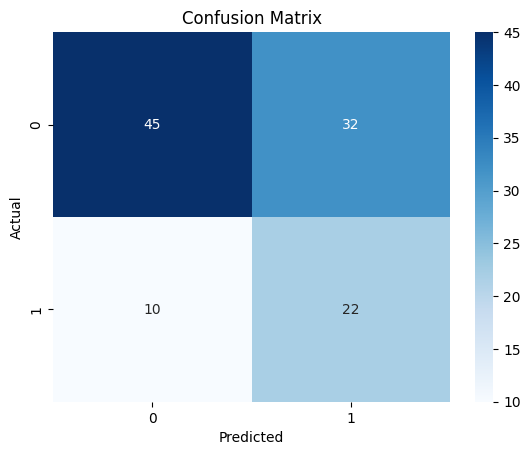

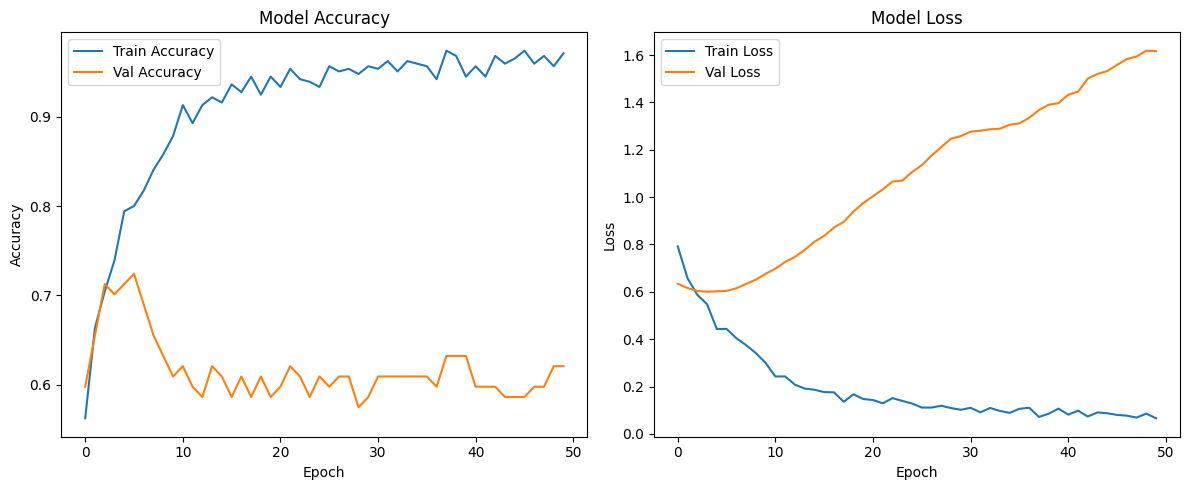

In [4]:
# 1. Upload and load the dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Load the uploaded file
df = pd.read_excel(next(iter(uploaded)))

# 2. Clean and explore
print("Initial Data Snapshot:")
print(df.head())

# Strip whitespace from column names
df.columns = df.columns.astype(str).str.strip()

# Drop clearly irrelevant or empty columns
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col or 'Patient File No' in col], errors='ignore')

# Remove rows with too many missing values
df.dropna(thresh=int(df.shape[1]*0.8), inplace=True)  # Keep rows with at least 80% non-null

# Convert all columns that can be numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')  # keep non-numeric if necessary

# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Print how many rows remain
print(f"\nCleaned data shape: {df.shape}")

# 3. Separate features and target
target_col = 'PCOS (Y/N)'
df[target_col] = df[target_col].astype(int)

X = df.drop(columns=[target_col])
y = df[target_col]

# Convert any remaining categorical columns if present
X = pd.get_dummies(X)

# 4. Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Build the neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 7. Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# 8. Evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.2f}")

# 9. Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 10. Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
